### Coders Cave Internship - Data Science (Santha lakshmi S)
## PHASE 1 - Task - 1 : Analyze Customer Behavior based on Transaction Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = "/content/Hackathon_Ideal_Data.csv"
df = pd.read_csv(dataset)

# 1. Explore the data

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB
None


In [3]:
# Summary statistics
print(df.describe())

                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


In [4]:
# Check for missing values
print(df.isnull().sum())

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


# 2. Exploratory Data Analysis (EDA)

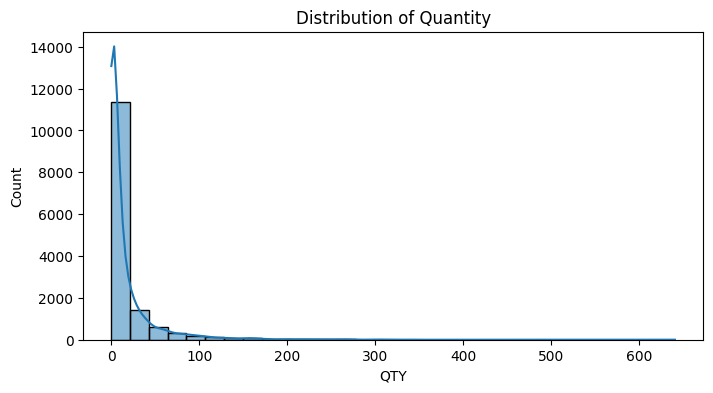

In [6]:
# Overview of Transactions
plt.figure(figsize=(8,4))
sns.histplot(df['QTY'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.show()

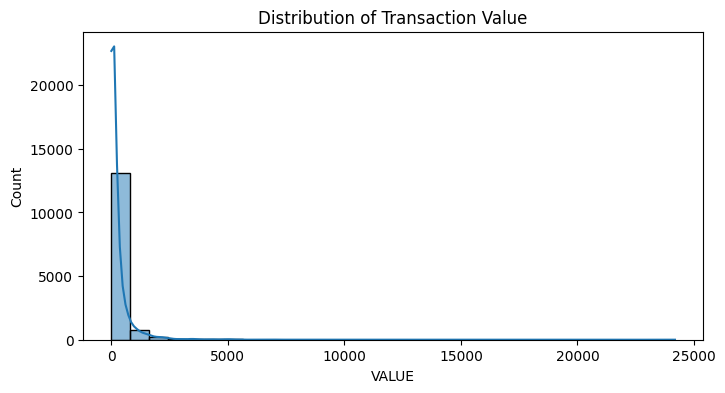

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['VALUE'], bins=30, kde=True)
plt.title('Distribution of Transaction Value')
plt.show()

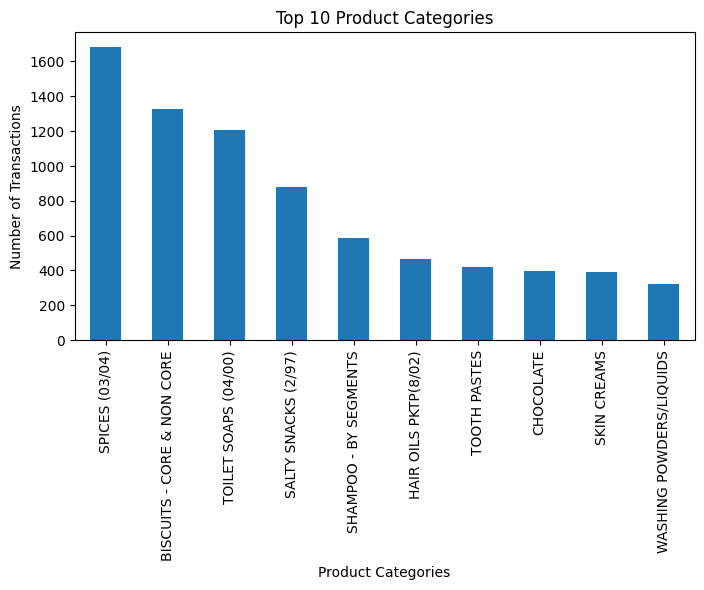

In [8]:
# Customer Preferences
top_categories = df['GRP'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_categories.plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Number of Transactions')
plt.show()

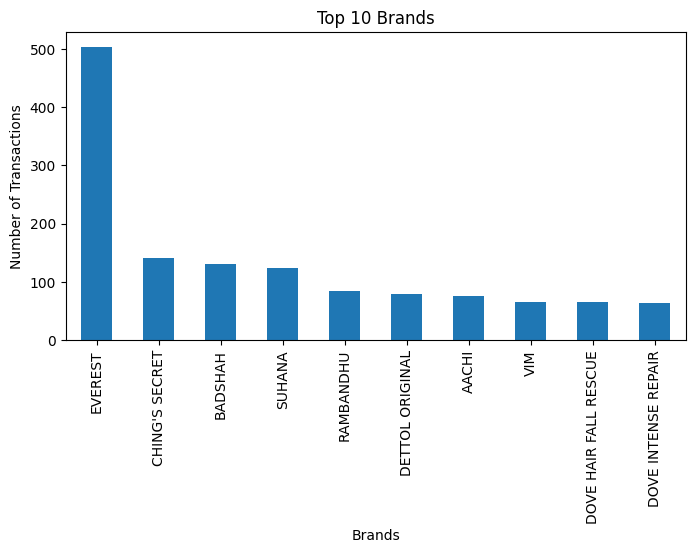

In [9]:
top_brands = df['BRD'].value_counts().head(10)
plt.figure(figsize=(8,4))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands')
plt.xlabel('Brands')
plt.ylabel('Number of Transactions')
plt.show()

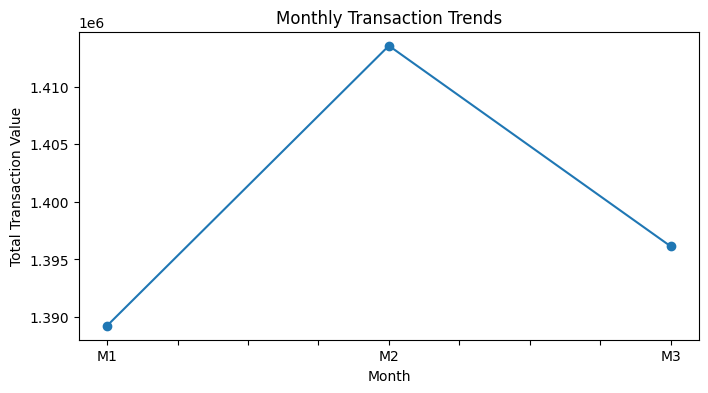

In [10]:
# Purchasing Patterns
monthly_trends = df.groupby('MONTH')['VALUE'].sum()
plt.figure(figsize=(8,4))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()

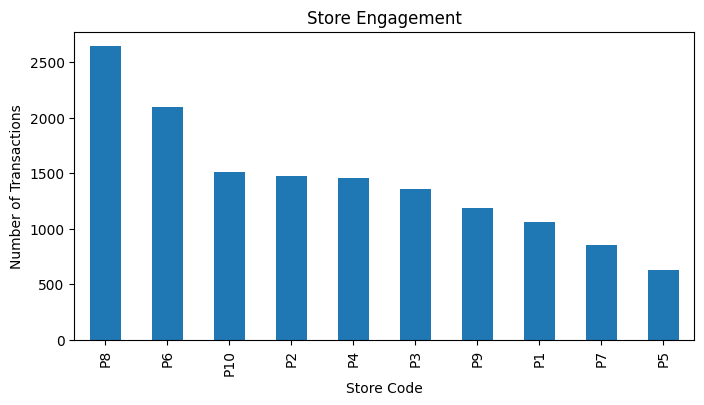

In [11]:
# Customer Loyalty
store_engagement = df['STORECODE'].value_counts()
plt.figure(figsize=(8,4))
store_engagement.plot(kind='bar')
plt.title('Store Engagement')
plt.xlabel('Store Code')
plt.ylabel('Number of Transactions')
plt.show()

# 3. Data Visualization

<ipython-input-12-a7e403a59ef7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


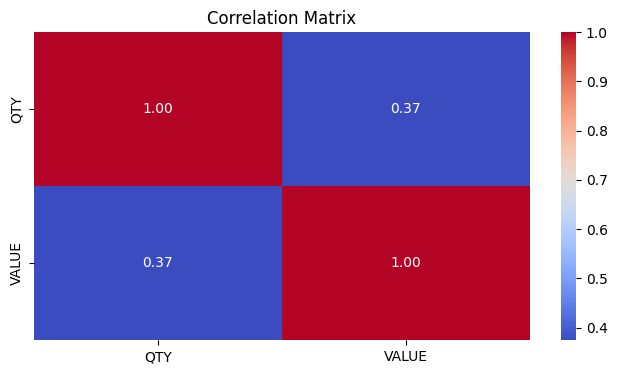

In [12]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Feature Engineering

In [13]:
# Creating a new feature for average spending per transaction
df['AVG_SPENDING'] = df['VALUE'] / df['QTY']

# 5. Correlation Analysis

In [14]:
# Explore correlations between numerical variables
correlation_matrix = df.corr()
print(correlation_matrix)

                   QTY     VALUE  AVG_SPENDING
QTY           1.000000  0.374090     -0.187901
VALUE         0.374090  1.000000      0.269741
AVG_SPENDING -0.187901  0.269741      1.000000


<ipython-input-14-86f9ab0d8e7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


# 6. Conclusion and Insights

In [15]:
# Print or display relevant findings based on the analysis
print("Top 5 product categories:", df['GRP'].value_counts().head())

Top 5 product categories: SPICES (03/04)                1683
BISCUITS - CORE & NON CORE    1325
TOILET SOAPS (04/00)          1204
SALTY SNACKS (2/97)            877
SHAMPOO - BY SEGMENTS          584
Name: GRP, dtype: int64


# 7. Documentation and Reporting

In [18]:
df.to_csv('cleaned_dataset.csv', index=False)